# Presentación 21:

En esta presentación veremos cómo ajustar un modelo $SARIMA(p, d, q)\times(P, D, Q)_s$ con variables exógenas en Python.

## Actividad de clase:

Considere las bases de datos del petróleo brent (con nombre __petroleo_brent_historico.csv__) y de la tasa representativa del mercado (__trm_historico.csv__) que se encuentran en la carpeta DATOS del Google Drive.

1. Lea ambas bases de datos.

2. Una las dos bases de datos en una sola BD.

3. Realice un gráfico donde aparezcan ambas series de tiempo.

4. Ajuste un modelo de regresión con los errores descritos por medio de un proceso ARIMA.

5. Realice un diagnóstico del modelo y saque conclusiones.

6. Divida la BD en dos conjuntos: entrenamiento y prueba.

7. Encuentre un modelo con la función __auto_arima__.

8. Realice un diagnóstico del modelo y saque conclusiones.



In [ ]:
!pip install pyjanitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # Para importar Bases de Datos
from matplotlib import pyplot as plt # Para realizar gráficos básicos
from statsmodels.tsa.arima.model import ARIMA #Para ajustar modelos con la función ARIMA
from janitor import clean_names
from datetime import datetime

In [ ]:
BD_TRM = pd.read_csv("/content/trm_historico.csv")

In [ ]:
BD_TRM.head()

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,2850.98,COP,09/10/2002,09/10/2002
1,2854.04,COP,10/10/2002,10/10/2002
2,2870.63,COP,11/10/2002,11/10/2002
3,2861.16,COP,12/10/2002,15/10/2002
4,2852.99,COP,16/10/2002,16/10/2002


In [ ]:
BD_PBH = pd.read_csv("/content/petroleo_brent_historico.csv", decimal=",")

In [ ]:
BD_PBH.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,14.03.2022,106.90,113.15,113.15,103.49,"265,91K","-5,12%"
1,11.03.2022,112.67,110.26,113.91,107.13,"287,39K","3,05%"
2,10.03.2022,109.33,112.65,118.36,109.00,"352,34K","-1,63%"
3,09.03.2022,111.14,130.28,131.64,105.60,"521,58K","-13,16%"
4,08.03.2022,127.98,124.56,133.15,121.31,"469,99K","3,87%"


In [ ]:
BD_PBH.dtypes

Fecha        object
Último      float64
Apertura    float64
Máximo      float64
Mínimo      float64
Vol.         object
% var.       object
dtype: object

Cambiar nombre de variables

In [ ]:
BD_TRM = BD_TRM.rename(columns={"VIGENCIADESDE":"Fecha"})

In [ ]:
BD_PBH.Fecha=pd.to_datetime(BD_PBH.Fecha, format = "%d.%m.%Y") #CONVERTIR A VARIABLE FECHA
BD_PBH.sort_values(by="Fecha", inplace=True)

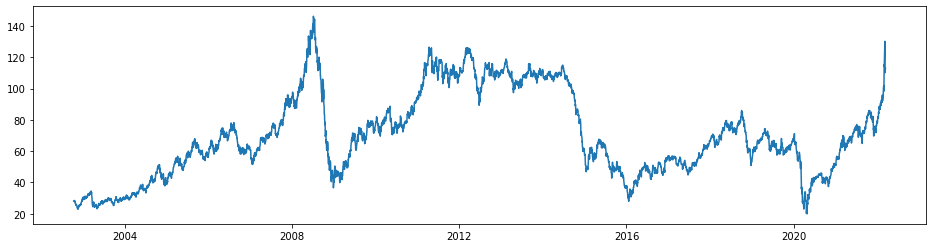

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(BD_PBH.Fecha, BD_PBH.Apertura)
plt.show()

In [ ]:
BD_TRM.Fecha=pd.to_datetime(BD_TRM.Fecha, format ="%d/%m/%Y") #CONVERTIR A VARIABLE FECHA
BD_TRM.sort_values(by="Fecha", inplace=True)

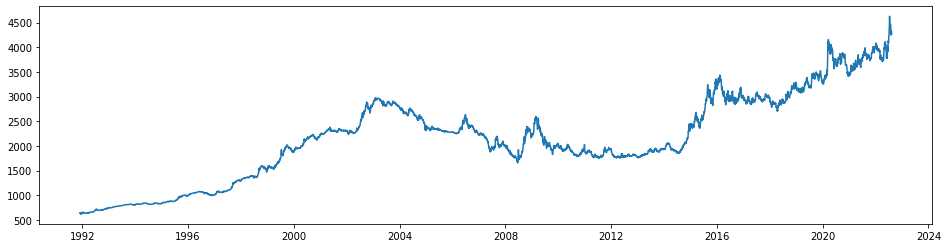

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(BD_TRM.Fecha, BD_TRM.VALOR)
plt.show()

Union de bases

In [ ]:
BDJ = pd.merge(BD_TRM, BD_PBH, on="Fecha")

In [ ]:
BDJ.head()

,VALOR,UNIDAD,Fecha,VIGENCIAHASTA,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2850.98,COP,2002-10-09,09/10/2002,28.13,28.09,28.40,27.87,"31,44K","0,14%"
1,2854.04,COP,2002-10-10,10/10/2002,27.74,28.00,28.00,27.35,"27,11K","-1,39%"
2,2870.63,COP,2002-10-11,11/10/2002,27.99,27.90,28.10,27.85,"24,17K","0,90%"
3,2852.99,COP,2002-10-16,16/10/2002,28.58,28.50,28.70,28.34,"10,03K","0,28%"
4,2857.13,COP,2002-10-17,17/10/2002,27.97,27.68,28.09,27.55,"41,70K","-2,13%"


In [ ]:
BDJ.tail()

,VALOR,UNIDAD,Fecha,VIGENCIAHASTA,Último,Apertura,Máximo,Mínimo,Vol.,% var.
3632,3771.77,COP,2022-03-04,04/03/2022,118.11,114.23,118.98,109.62,"334,41K","6,93%"
3633,3813.41,COP,2022-03-08,08/03/2022,127.98,124.56,133.15,121.31,"469,99K","3,87%"
3634,3787.18,COP,2022-03-09,09/03/2022,111.14,130.28,131.64,105.60,"521,58K","-13,16%"
3635,3746.43,COP,2022-03-10,10/03/2022,109.33,112.65,118.36,109.00,"352,34K","-1,63%"
3636,3786.00,COP,2022-03-11,11/03/2022,112.67,110.26,113.91,107.13,"287,39K","3,05%"


In [ ]:
BDJ.shape

(3637, 10)

In [ ]:
BDJ.dtypes

VALOR                   float64
UNIDAD                   object
Fecha            datetime64[ns]
VIGENCIAHASTA            object
Último                  float64
Apertura                float64
Máximo                  float64
Mínimo                  float64
Vol.                     object
% var.                   object
dtype: object

In [ ]:
BDJ = BDJ.rename(columns={"Apertura":"Brent", "VALOR":"TRM"}) #Cambio nombre variables

In [ ]:
#BDJ.Brent = [float(x.replace(",",".")) for x in BDJ["Brent"]] #Cambiar object a float 

In [ ]:
BDJ.sort_values(by="Fecha", inplace=True)

Gráfica

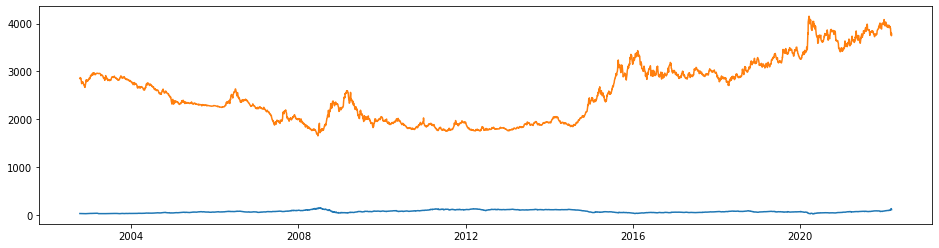

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(BDJ.Fecha, BDJ.Brent)
plt.plot(BDJ.Fecha, BDJ.TRM)
plt.show()